<a href="https://colab.research.google.com/github/david1497/NYC-Airbnb-project/blob/master/BI_Project_Jaime_Vadim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas

In [ ]:
'''Importing Data Manipulation Modules'''
import numpy as np                 # Linear Algebra
import pandas as pd                # Data Processing, CSV file I/O (e.g. pd.read_csv)

'''Seaborn and Matplotlib Visualization'''
import matplotlib                  # 2D Plotting Library
import matplotlib.pyplot as plt
import seaborn as sns              # Python Data Visualization Library based on matplotlib
import geopandas as gpd            # Python Geospatial Data Library
plt.style.use('fivethirtyeight')
%matplotlib inline

'''Plotly Visualizations'''
import plotly as plotly                # Interactive Graphing Library for Python
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

'''Spatial Visualizations'''
import folium
import folium.plugins

'''NLP - WordCloud'''
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

'''Machine Learning'''
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('https://drive.google.com/file/d/1ux_ng3Y5AKPeLeDoU1pr4tBQS67U7SDm/view?usp=sharing')

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00,48895.00,38843.00,48895.00,48895.00
mean,19017143.24,67620010.65,40.73,-73.95,152.72,7.03,23.27,1.37,7.14,112.78
std,10983108.39,78610967.03,0.05,0.05,240.15,20.51,44.55,1.68,32.95,131.62
min,2539.00,2438.00,40.50,-74.24,0.00,1.00,0.00,0.01,1.00,0.00
25%,9471945.00,7822033.00,40.69,-73.98,69.00,1.00,1.00,0.19,1.00,0.00
50%,19677284.00,30793816.00,40.72,-73.96,106.00,3.00,5.00,0.72,1.00,45.00
75%,29152178.50,107434423.00,40.76,-73.94,175.00,5.00,24.00,2.02,2.00,227.00
max,36487245.00,274321313.00,40.91,-73.71,10000.00,1250.00,629.00,58.50,327.00,365.00


## Study Outliers

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

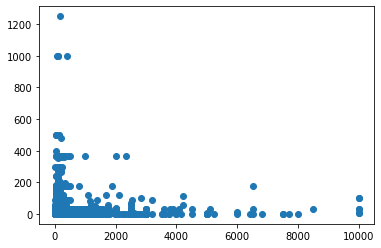

In [ ]:
plt.scatter(df.price, df.minimum_nights)

In [ ]:
'''df[df['minimum_nights']==1250]
class_mapping = {5767:7}
df['minimum_nights'] =  df['minimum_nights'].map(class_mapping)'''

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
5767,4204302,Prime W. Village location 1 bdrm,17550546,Genevieve,Manhattan,Greenwich Village,40.73,-74.00,Entire home/apt,180,1250,2,2014-11-09,0.03,1,365


## Check missing data




In [ ]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# Prepare the data
***
1. Impute missing data
2. Feature encoding
3. Create features `nºdays * minimum nights`
4. Convert to categorical


***

### 1. Impute Missing Data

In [ ]:
df[["name", "host_name"]] = df[["name", "host_name"]].fillna("missing")

In [ ]:
df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### 2. Feature encoding

In [ ]:
dummies = pd.get_dummies(df[["neighbourhood", "neighbourhood_group", "room_type"]])

In [ ]:
df_dummies = pd.concat([df.drop(["neighbourhood", "neighbourhood_group", "room_type"], axis=1), dummies], axis=1)

In [ ]:
df_dummies.head()

,id,name,host_id,host_name,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_Allerton,neighbourhood_Arden Heights,neighbourhood_Arrochar,neighbourhood_Arverne,neighbourhood_Astoria,neighbourhood_Bath Beach,neighbourhood_Battery Park City,neighbourhood_Bay Ridge,neighbourhood_Bay Terrace,"neighbourhood_Bay Terrace, Staten Island",neighbourhood_Baychester,neighbourhood_Bayside,neighbourhood_Bayswater,neighbourhood_Bedford-Stuyvesant,neighbourhood_Belle Harbor,neighbourhood_Bellerose,neighbourhood_Belmont,neighbourhood_Bensonhurst,neighbourhood_Bergen Beach,neighbourhood_Boerum Hill,neighbourhood_Borough Park,neighbourhood_Breezy Point,neighbourhood_Briarwood,neighbourhood_Brighton Beach,neighbourhood_Bronxdale,neighbourhood_Brooklyn Heights,neighbourhood_Brownsville,...,neighbourhood_Sunnyside,neighbourhood_Sunset Park,neighbourhood_Theater District,neighbourhood_Throgs Neck,neighbourhood_Todt Hill,neighbourhood_Tompkinsville,neighbourhood_Tottenville,neighbourhood_Tremont,neighbourhood_Tribeca,neighbourhood_Two Bridges,neighbourhood_Unionport,neighbourhood_University Heights,neighbourhood_Upper East Side,neighbourhood_Upper West Side,neighbourhood_Van Nest,neighbourhood_Vinegar Hill,neighbourhood_Wakefield,neighbourhood_Washington Heights,neighbourhood_West Brighton,neighbourhood_West Farms,neighbourhood_West Village,neighbourhood_Westchester Square,neighbourhood_Westerleigh,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539,Clean & quiet apt home by the park,2787,John,40.65,-73.97,149,1,9,2018-10-19,0.21,6,365,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2595,Skylit Midtown Castle,2845,Jennifer,40.75,-73.98,225,1,45,2019-05-21,0.38,2,355,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,40.81,-73.94,150,3,0,NaN,nan,1,365,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,40.69,-73.96,89,1,270,2019-07-05,4.64,1,194,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,40.80,-73.94,80,10,9,2018-11-19,0.10,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0


### 3. Create new features `min_nights_rev`

In [ ]:
df['min_nights_rev'] = df['minimum_nights'] * df['number_of_reviews']

In [ ]:
df['min_nights_rev'].describe()

count   48895.00
mean       90.41
std       544.37
min         0.00
25%         2.00
50%        16.00
75%        70.00
max     62800.00
Name: min_nights_rev, dtype: float64

### 4. Convert to categorical

`min_night_rev`

In [ ]:
df.loc[ df['min_night_rev'] == 0, 'number_of_reviews_categories'] = 0
df.loc[(df['number_of_reviews'] > 0) & (df['number_of_reviews'] <= 5), 'number_of_reviews_categories'] = "0-5"
df.loc[(df['number_of_reviews'] > 5) & (df['number_of_reviews'] <= 10), 'number_of_reviews_categories'] = "5-10"
df.loc[(df['number_of_reviews'] > 10) & (df['number_of_reviews'] <= 20), 'number_of_reviews_categories'] = "10-20"
df.loc[(df['number_of_reviews'] > 20) & (df['number_of_reviews'] <= 50), 'number_of_reviews_categories'] = "20-50"

`number of reviews`

In [ ]:
df['number_of_reviews'] = df['number_of_reviews'].astype(int)
df.loc[ df['number_of_reviews'] == 0, 'number_of_reviews'] = 0
df.loc[(df['number_of_reviews'] > 0) & (df['number_of_reviews'] <= 5), 'number_of_reviews'] = 1
df.loc[(df['number_of_reviews'] > 5) & (df['number_of_reviews'] <= 10), 'number_of_reviews'] = 2
df.loc[(df['number_of_reviews'] > 10) & (df['number_of_reviews'] <= 20), 'number_of_reviews'] = 3
df.loc[(df['number_of_reviews'] > 20) & (df['number_of_reviews'] <= 50), 'number_of_reviews'] = 4
df.loc[(df['number_of_reviews'] > 50) & (df['number_of_reviews'] <= 100), 'number_of_reviews'] = 5
df.loc[df['number_of_reviews'] > 100, 'number_of_reviews'] = 6

# let's see how it's distributed 
df['number_of_reviews'].value_counts()

1    14841
0    10052
4     6290
2     5430
3     5323
5     3964
6     2995
Name: number_of_reviews, dtype: int64

In [ ]:
# Making the plot understandable
df.loc[ df['number_of_reviews'] == 0, 'number_of_reviews_categories'] = 0
df.loc[(df['number_of_reviews'] > 0) & (df['number_of_reviews'] <= 5), 'number_of_reviews_categories'] = "0-5"
df.loc[(df['number_of_reviews'] > 5) & (df['number_of_reviews'] <= 10), 'number_of_reviews_categories'] = "5-10"
df.loc[(df['number_of_reviews'] > 10) & (df['number_of_reviews'] <= 20), 'number_of_reviews_categories'] = "10-20"
df.loc[(df['number_of_reviews'] > 20) & (df['number_of_reviews'] <= 50), 'number_of_reviews_categories'] = "20-50"
df.loc[(df['number_of_reviews'] > 50) & (df['number_of_reviews'] <= 100), 'number_of_reviews_categories'] = "50-100"
df.loc[df['number_of_reviews'] > 100, 'number_of_reviews_categories'] = ">100"

# EDA

In [ ]:
df.corr().style.background_gradient(cmap='coolwarm')

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


In [ ]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

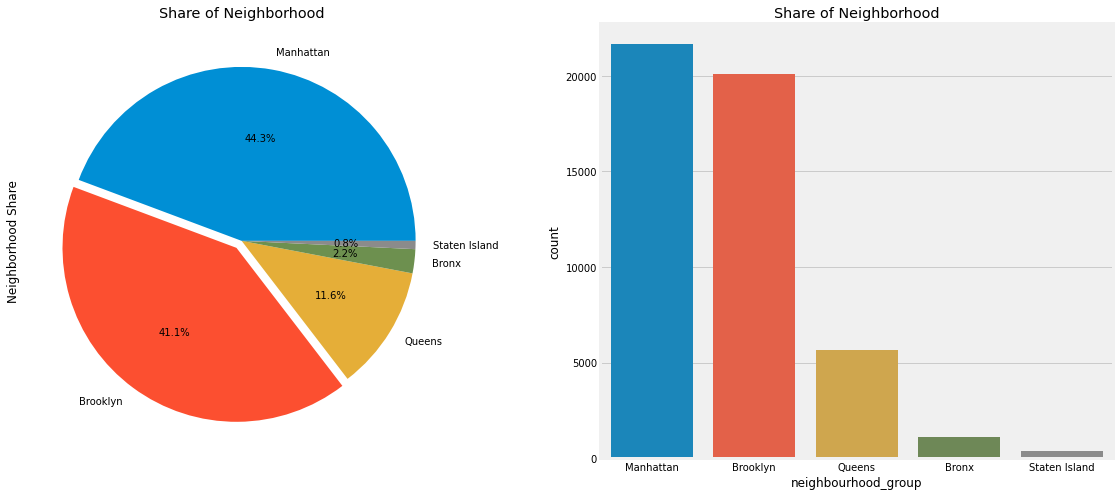

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['neighbourhood_group'].value_counts().plot.pie(explode=[0,0.05,0,0,0],autopct='%1.1f%%',ax=ax[0],shadow=False)
ax[0].set_title('Share of Neighborhood')
ax[0].set_ylabel('Neighborhood Share')
sns.countplot('neighbourhood_group',data=df,ax=ax[1],order=df['neighbourhood_group'].value_counts().index)
ax[1].set_title('Share of Neighborhood')
plt.show()

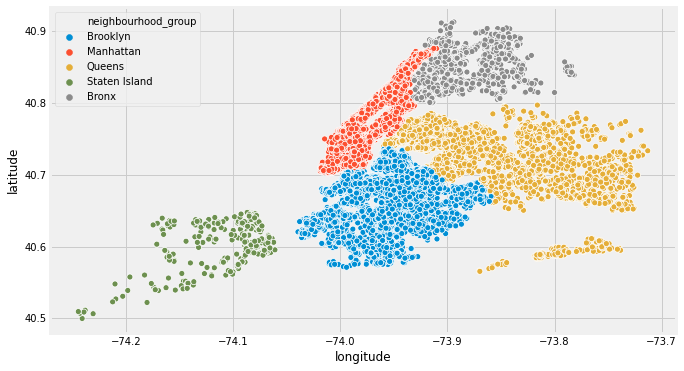

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()

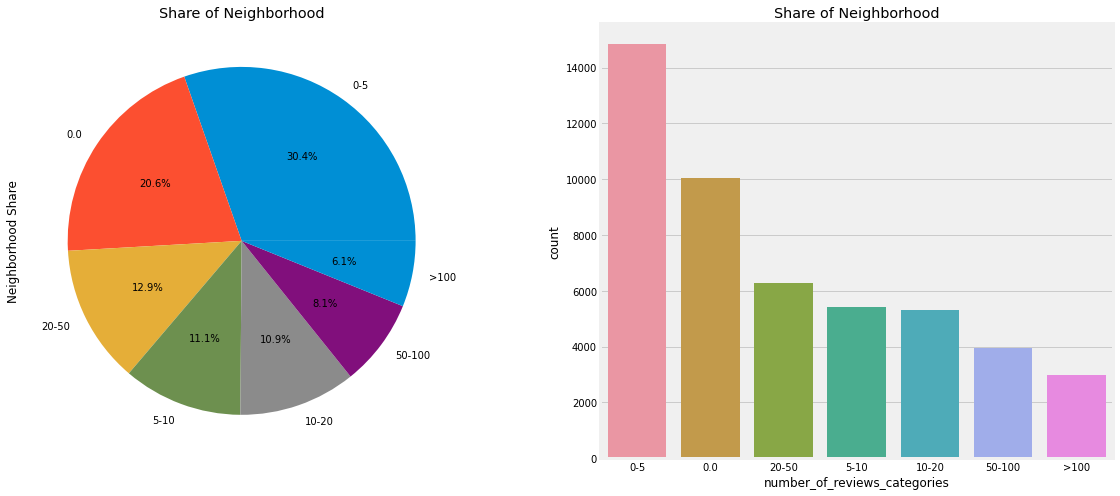

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['number_of_reviews_categories'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=False)
ax[0].set_title('Number of reviews')
ax[0].set_ylabel('Number of Reviews')
sns.countplot('number_of_reviews_categories',order=df['number_of_reviews_categories'].value_counts().index, data=df,ax=ax[1])
ax[1].set_title('Number of reviews')
plt.show()